# Implementing time series forecasting in python using GAIL Stock Market Dataset (2000-2021)

# ARIMA Forecasting

ARIMA - Autoregressive Integrated Moving Average
ARIMA model is a class of linear models that utilizes historical values to forecast future values. ARIMA stands for Autoregressive Integrated Moving Average, each of which technique contributes to the final forecast.
AR- AutoRegression: A model that uses the dependent relationship beyween an observation and some no. of lagged observations

I - Integrated : The use of differencing of raw observations( eg subtracting an observation from an observation at the     
previous time stamp

MA: Moving Average : A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations

p: The number of lagged observations included in the model, lag order

d: the number of times that the raw observations are differenced also called , differencing

q: the size of moving average window,also called the order of moving average

ARIMA takes into account the past values (autoregressive, moving average) and predicts future values based on that.

Detrending/ Stationarity: Before forecasting, we want our time series variables to be mean-variance stationery. This means that the statistical properties of a model do not vary depending on when the sample was taken. Models built on stationary data are generally more robust. This can be achieved by using differencing.

Anomaly detection: Any outlier present in the data might skew the forecasting results so it’s often considered a good practice to identify and normalize outliers before moving on to forecasting. 

Check for sampling frequency: This is an important step to check the regularity of sampling. Irregular data has to be imputed or made uniform before applying any modeling techniques because irregular sampling leads to broken integrity of the time series and doesn’t fit well with the models.

Missing data: At times there can be missing data for some datetime values and it needs to be addressed before modeling.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [2]:
df = pd.read_csv("C:/Users/Naman Kapoor/Desktop/GAIL.csv")

In [3]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2529
Deliverable Volume     188
%Deliverble            188
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2529,2011-06-01,GAIL,EQ,444.80,441.30,454.0,441.30,452.40,452.65,450.19,558643,2.514971e+13,13902.0,232390.0,0.4160
2530,2011-06-02,GAIL,EQ,452.65,448.00,453.5,441.80,446.65,447.70,447.21,499302,2.232951e+13,10476.0,274157.0,0.5491
2531,2011-06-03,GAIL,EQ,447.70,449.70,451.6,437.00,439.30,439.60,443.08,662936,2.937346e+13,13679.0,364792.0,0.5503
2532,2011-06-06,GAIL,EQ,439.60,441.50,441.5,431.10,433.00,432.15,432.55,705184,3.050277e+13,16917.0,481636.0,0.6830
2533,2011-06-07,GAIL,EQ,432.15,435.00,437.5,431.15,437.50,435.75,433.50,728729,3.159058e+13,19281.0,436550.0,0.5991
2534,2011-06-08,GAIL,EQ,435.75,436.05,444.3,435.00,444.20,443.50,440.61,495061,2.181264e+13,12516.0,246541.0,0.4980
2535,2011-06-09,GAIL,EQ,443.50,444.00,447.5,439.50,445.80,445.05,443.63,418023,1.854477e+13,9132.0,200118.0,0.4787
2536,2011-06-10,GAIL,EQ,445.05,442.75,447.0,440.30,445.40,445.15,444.43,566016,2.515531e+13,10030.0,398397.0,0.7039
2537,2011-06-13,GAIL,EQ,445.15,444.95,452.0,444.00,450.90,450.00,449.64,757391,3.405550e+13,8496.0,570824.0,0.7537
2538,2011-06-14,GAIL,EQ,450.00,452.00,455.9,447.55,452.15,451.35,452.18,919915,4.159686e+13,29929.0,673508.0,0.7321


In [6]:
#A time series is a series of data points indexed in time order. 

#If you index the dataset by date, you can easily carry out a time series analysis.

In [7]:
#converting the data to date-time stamp

In [8]:
df.index = pd.to_datetime(df.Date)

In [9]:
df.index

DatetimeIndex(['2011-06-01', '2011-06-02', '2011-06-03', '2011-06-06',
               '2011-06-07', '2011-06-08', '2011-06-09', '2011-06-10',
               '2011-06-13', '2011-06-14',
               ...
               '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22',
               '2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='Date', length=2456, freq=None)

In [10]:
df['Prev Close']

Date
2011-06-01    444.80
2011-06-02    452.65
2011-06-03    447.70
2011-06-06    439.60
2011-06-07    432.15
               ...  
2021-04-26    129.40
2021-04-27    130.00
2021-04-28    131.55
2021-04-29    133.35
2021-04-30    134.80
Name: Prev Close, Length: 2456, dtype: float64

In [11]:
df = df['Prev Close']['2013-01-01':'2013-12-2']
df.describe()

count    230.000000
mean     327.963043
std       20.005082
min      281.950000
25%      314.725000
50%      329.100000
75%      339.787500
max      388.000000
Name: Prev Close, dtype: float64

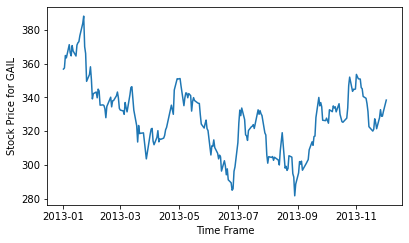

In [12]:
plt.figure(figsize=(14,8))
fig = plt.figure(1)
ax1= fig.add_subplot(222)#222 means 2x2 grid
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for GAIL')
ax1.plot(df)

In [ ]:
#checking stationarity
#method1:rolling statistics
#A rolling analysis of a time series model is often used to assess the model’s stability over time.
#When analyzing financial time series data using a statistical model, a key assumption is that the parameters of the model are constant over time

In [ ]:
# determining rolling statistics

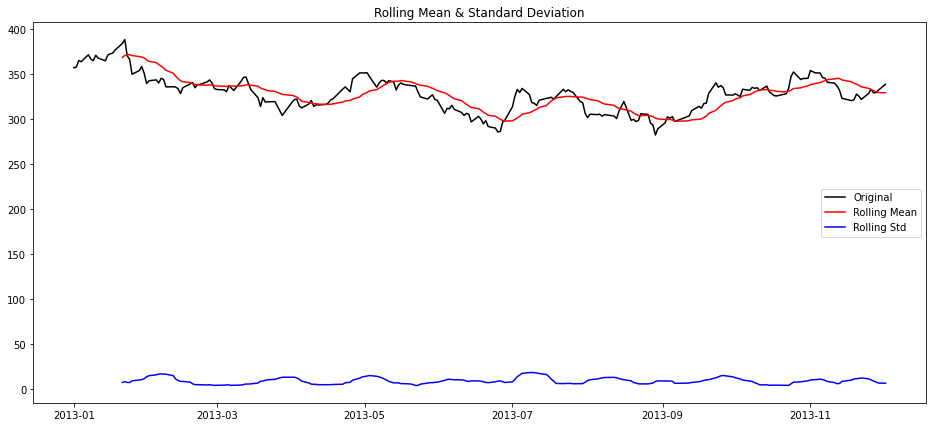

In [14]:
roll_mean = df.rolling(15).mean() # taking rollin mean of 15 enteries
roll_std = df.rolling(15).std()# takinn rolling std dev. of 15 enteries

plt.figure(figsize=(16,7))

#plot rolling statistics
orig = plt.plot(df, color = 'black',label = 'Original')
mean = plt.plot(roll_mean, color = 'red',label = 'Rolling Mean')
std = plt.plot(roll_std, color = 'blue',label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


In [ ]:
# Here rolling standard dev is constant but rolling mean is not constant

# Making series stationary

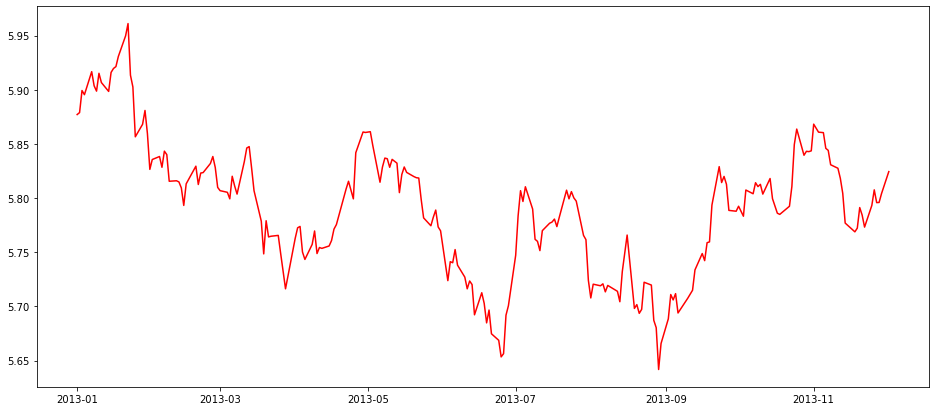

In [17]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

#we can take any kind of transformations but trying with the log transformation at the moment
ts_log = np.log(df)
plt.plot(ts_log,color = 'Red')

In [ ]:
# It is clearly visible from the above graph that the log transformation is not making the series stationary.
#To re-insure we will use decomposition method which will divde the series into four components

C:\Users\NAMANK~1\AppData\Local\Temp/ipykernel_21192/1500103094.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(ts_log,freq=1,model='Multiplicative')


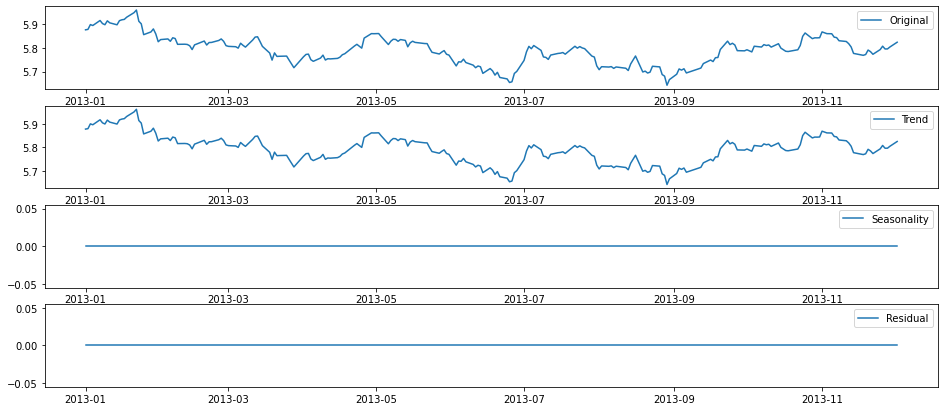

In [19]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=1,model='Multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

# 4x1 grid , 1st subplot
plt.subplot(411)
plt.plot(ts_log,label = 'Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label = 'Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label = 'Residual')
plt.legend(loc='best')


In [ ]:
# It is now evident that only Trend component(Not Stationary) is contributing to the Original Series an

# Applying Differencing method

We will shift the time series by 1 and subtract the difference from the series.

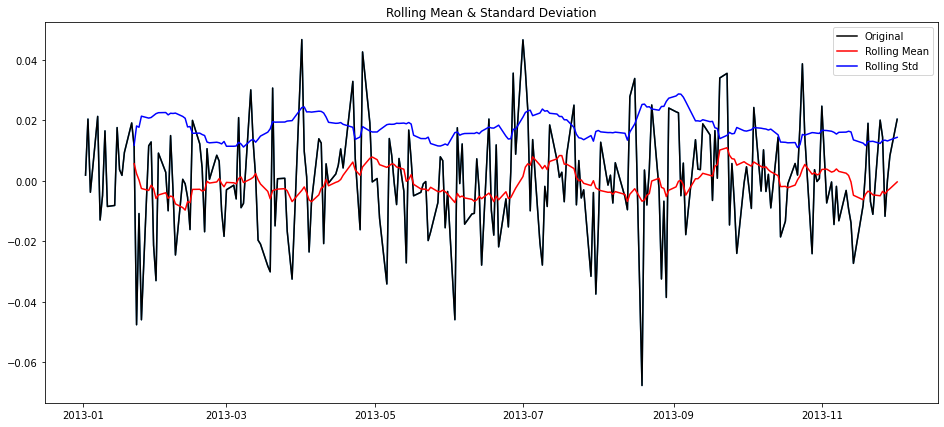

In [21]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

roll_mean = ts_log_diff.rolling(15).mean() # taking rollin mean of 15 enteries
roll_std = ts_log_diff.rolling(15).std()# takinn rolling std dev. of 15 enteries


#plot rolling statistics
orig = plt.plot(ts_log_diff, color = 'black',label = 'Original')
mean = plt.plot(roll_mean, color = 'red',label = 'Rolling Mean')
std = plt.plot(roll_std, color = 'blue',label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()



In [ ]:
# Since there is no upward trend in the mean and std deviation , we assume that the series is now stationary

In [24]:
#ACF and PACF assume stationarity of the underlying time series.
#Stationarity can be checked by performing an Augmented Dickey-Fuller (ADF) test:

#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
#applying the model

# Autocorrelation Function (ACF)
Correlation between time series with a lagged version of itself. The correlation between the observation at the current time spot and the observations at previous time spots.The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

The autocorrelation analysis helps in detecting hidden patterns and seasonality and in checking for randomness.

# Partial Autocorrelation Function (PACF)
Additional correlation explained by each successive lagged term. The correlation between pbservations at two time spots given that we consider both observations are correlated to observations at other time spots.

The partial autocorrelation at lag k is the autocorrelation between  Xt  and  Xt−k  that is not accounted for by lags 1 through  k−1.



In [25]:
df.sort_index(inplace = True)

In [26]:
from statsmodels.tsa.stattools import acf,pacf # these will determine what will be the order of ar and ma component in arima model

lag_acf = acf(ts_log_diff,nlags = 20)
lag_pacf = pacf(ts_log_diff, nlags = 20)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


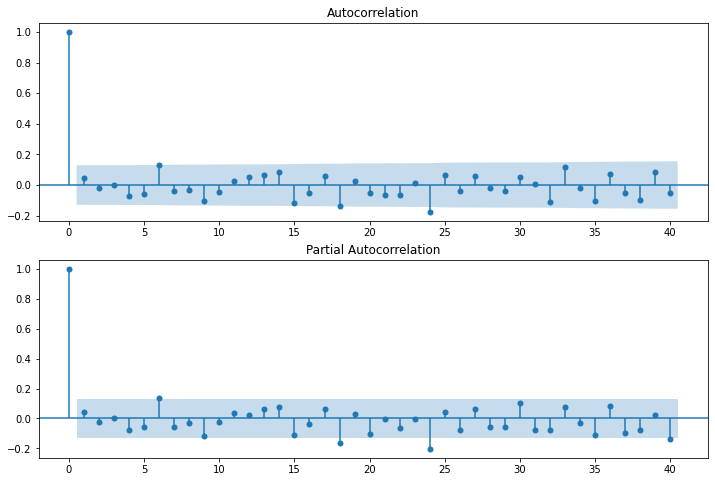

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax =ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax =ax2)


In [ ]:
#In this graph, 
#the thumb rule to find the order of the series is to see where the highlighted line(confidence interval) is crossed first.

In [ ]:
# Here the 7 line in both the graphs is crossing the interval, therefore the order for both the graph is 7.

In [31]:
#loading the model
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


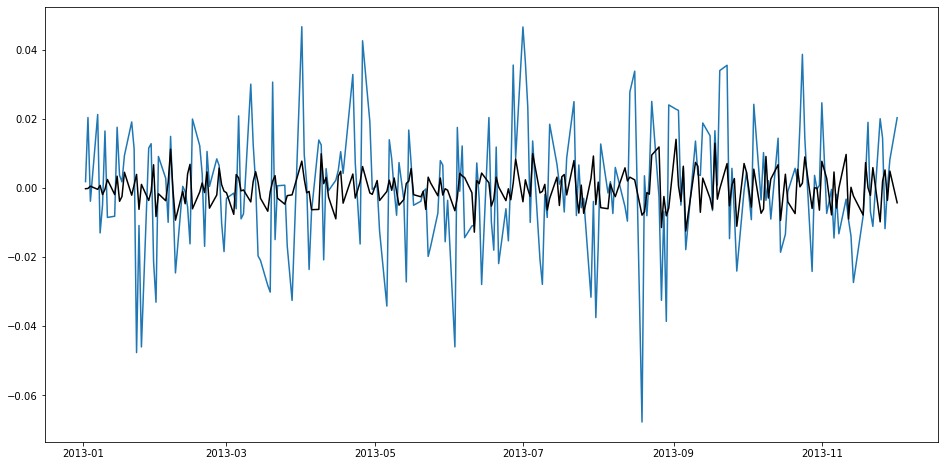

In [97]:
plt.figure(figsize=(16,8))
model = ARIMA(ts_log, order=(7,1,7))
results_ARIMA = model.fit(disp=1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='Black')

# Taking results back to the orginal

In [98]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues,copy = True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02   -0.000230
2013-01-03   -0.000157
2013-01-04    0.000501
2013-01-07   -0.000418
2013-01-08    0.000727
dtype: float64


In [99]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2013-01-02   -0.000230
2013-01-03   -0.000387
2013-01-04    0.000114
2013-01-07   -0.000305
2013-01-08    0.000422
dtype: float64


In [100]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0],index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value = 0) # here to compensate the differencing we are adding log_predictions to the cumsum value
ARIMA_log_prediction.head()

Date
2013-01-01    5.877035
2013-01-02    5.876805
2013-01-03    5.876648
2013-01-04    5.877149
2013-01-07    5.876731
dtype: float64

Text(0.5, 1.0, 'RMSE : 24.8924')

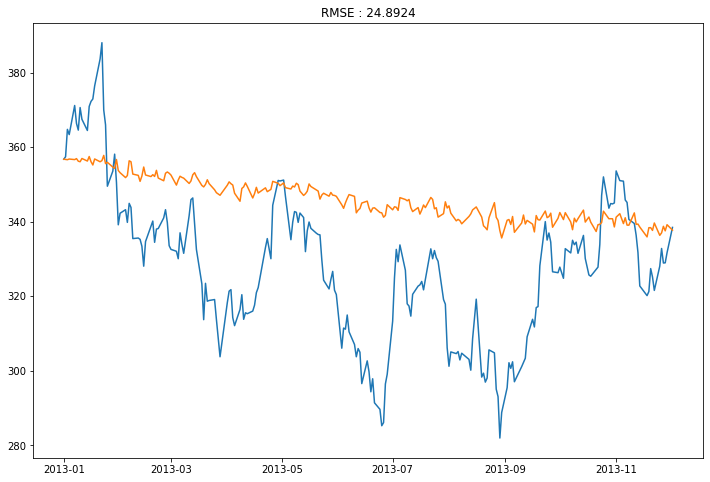

In [101]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)#taking exp value that is reverse of log value
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.title('RMSE : %.4f'%  np.sqrt(sum((predictions_ARIMA-df)**2)/len(df)))


In [ ]:
# An RMSE of 24.984 indicates that the accuracy is better, the accuracy can further be improved by implementing different transformation models